In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# Read data
dataset = pd.read_csv("../data/coronary.csv")
dataset

,Age Group,No,Yes,Total
0,1,9,1,10
1,2,13,2,15
2,3,9,3,12
3,4,10,5,15
4,5,7,6,13
5,6,3,5,8
6,7,4,13,17
7,8,2,8,10


In [3]:
p_chd = dataset["Yes"] / dataset["Total"]
odds = p_chd / (1 - p_chd)
log_odds = np.log(odds)

In [4]:
X = dataset["Age Group"].values
Y = log_odds

n = len(Y)

mean_y = np.mean(Y)
mean_x = np.mean(X)

cov_x_y = np.sum((X - mean_x) * (Y - mean_y)) / (n - 1)

var_x = np.sum((X - mean_x)**2) / (n - 1)

beta1 = cov_x_y / var_x
beta0 = mean_y - beta1 * mean_x

In [5]:
print(f"beta0 = {beta0}")
print(f"beta1 = {beta1}")

beta0 = -2.81583606204984
beta1 = 0.5440979603981423


Formula:
$$
\pi = \frac{1}{1+e^{-(\beta_0 + \beta_1\bullet X)}}
$$

In [6]:
f_pred = lambda x: 1 / (1 + np.exp(-(beta0 + beta1 * x)))

In [7]:
y_pred = f_pred(X)
y_pred

array([0.0934908 , 0.15088968, 0.2344159 , 0.34537218, 0.47618148,
       0.6103424 , 0.72965042, 0.82302056])

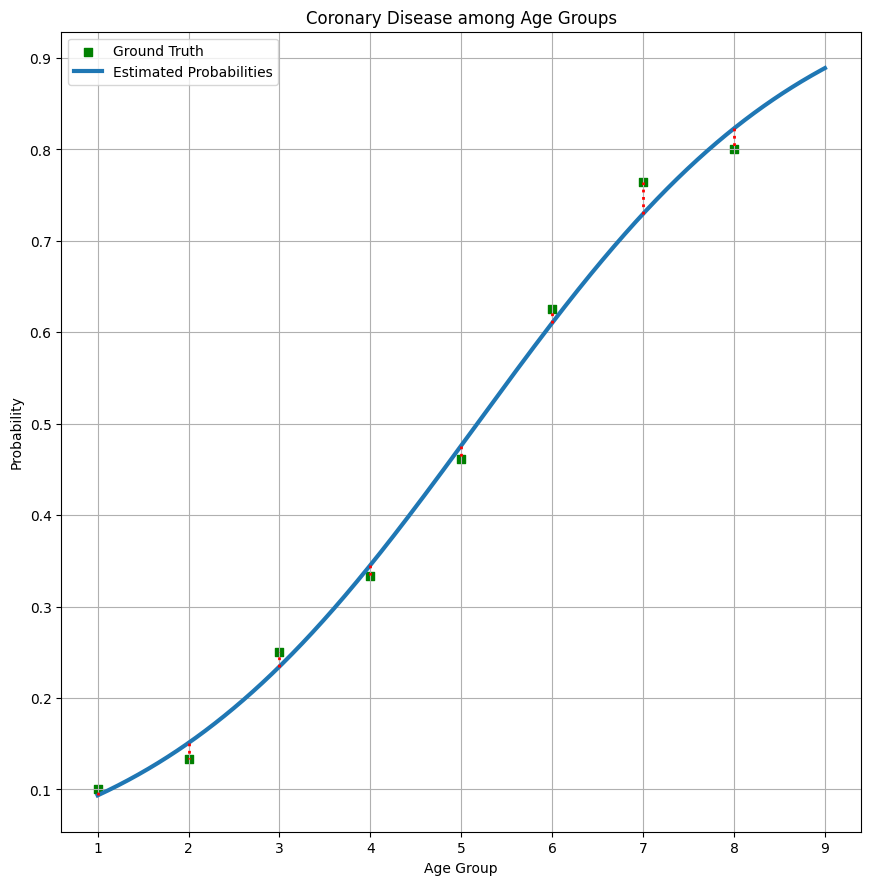

In [8]:
x_test = np.linspace(1, 9, 1000)
y_test = f_pred(x_test)
y_prob = 1/(1+np.exp(-Y))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(X, y_prob, label="Ground Truth", color="green", marker="s")
ax.plot(x_test, y_test, label="Estimated Probabilities", linewidth=3)
for i in range(len(X)):
    plt.plot([X[i], X[i]], [f_pred(X[i]), y_prob[i]], color='red', linestyle='dotted', linewidth=2)
ax.legend()
ax.set_xlabel("Age Group")
ax.set_ylabel("Probability")
ax.set_title("Coronary Disease among Age Groups")
ax.grid()